# Movie Rating Prediction with Python

Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.

# Imported libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Load dataset 

In [3]:
# Load the datasets with the correct encoding (ISO-8859-1)
movies = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')
ratings = pd.read_csv('ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='ISO-8859-1')
users = pd.read_csv('users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='ISO-8859-1')


In [4]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [7]:
# merge dataset using the common features in between them
movies_data = pd.merge(pd.merge(ratings, users), movies)

In [8]:
movies_data

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [9]:
# Cleaning preparing the dataset for the visualization
movies_data.shape

(1000209, 10)

In [10]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [11]:
# checking the null values
movies_data.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Title         0
Genres        0
dtype: int64

In [12]:
movies.duplicated().sum()

0

In [13]:
movies_data.drop(["Occupation", "Zip-code", "Timestamp"], axis=1, inplace=True)

In [14]:
movies_data.head()

,UserID,MovieID,Rating,Gender,Age,Title,Genres
0,1,1193,5,F,1,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,M,56,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,M,25,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,M,25,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,M,50,One Flew Over the Cuckoo's Nest (1975),Drama


In [15]:
movies_data.head()

,UserID,MovieID,Rating,Gender,Age,Title,Genres
0,1,1193,5,F,1,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,M,56,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,M,25,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,M,25,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,M,50,One Flew Over the Cuckoo's Nest (1975),Drama


# Data Visulalization

Text(0.5, 0, 'Age')

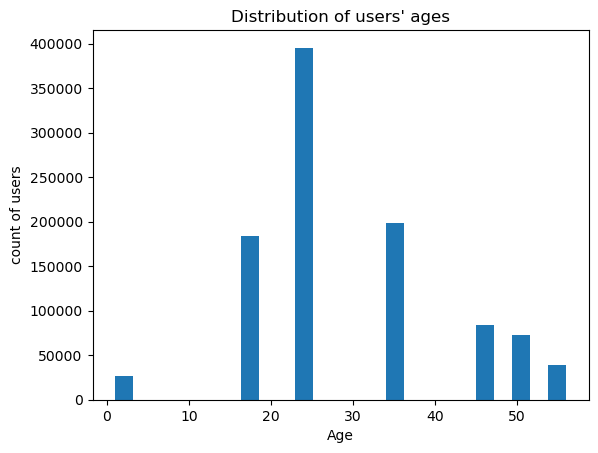

In [16]:
# Showing the data of the user on the basis of age 

movies_data.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [28]:
# Arrage the age, by creating age_group

labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
movies_data['age_group'] = pd.cut(movies_data.Age, range(0, 81, 10), right=False, labels=labels)
movies_data[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,1,0-9
1,56,50-59
2,25,20-29
4,50,50-59
5,18,10-19
9,45,40-49
20,35,30-39


Text(0.5, 0, 'Ratings')

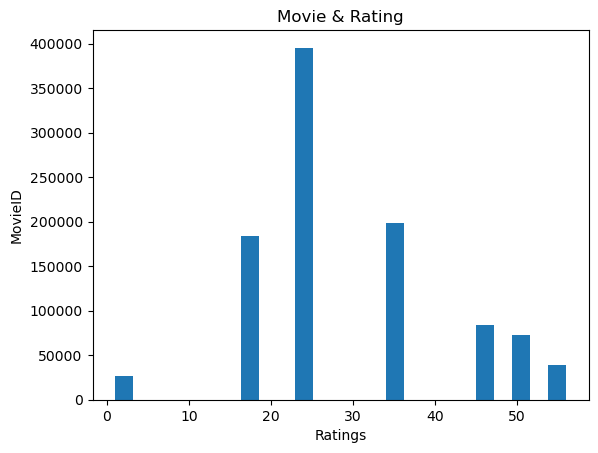

In [18]:
#Create a histogram for movie
movies_data.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

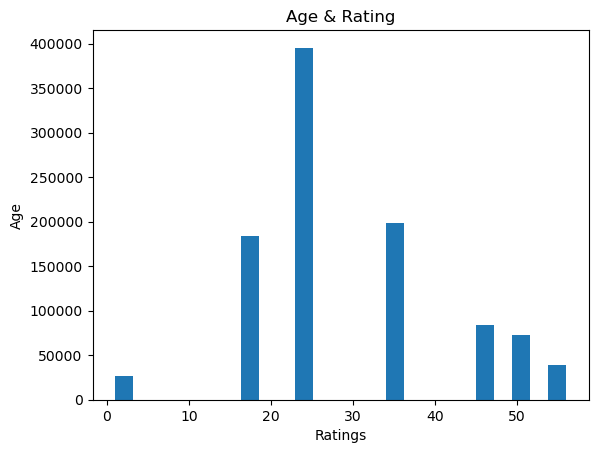

In [29]:
movies_data.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

# Data Modeling and creation

In [20]:
movies_data.head()

,UserID,MovieID,Rating,Gender,Age,Title,Genres,age_group
0,1,1193,5,F,1,One Flew Over the Cuckoo's Nest (1975),Drama,0-9
1,2,1193,5,M,56,One Flew Over the Cuckoo's Nest (1975),Drama,50-59
2,12,1193,4,M,25,One Flew Over the Cuckoo's Nest (1975),Drama,20-29
3,15,1193,4,M,25,One Flew Over the Cuckoo's Nest (1975),Drama,20-29
4,17,1193,5,M,50,One Flew Over the Cuckoo's Nest (1975),Drama,50-59


In [21]:
movies_data.head()

,UserID,MovieID,Rating,Gender,Age,Title,Genres,age_group
0,1,1193,5,F,1,One Flew Over the Cuckoo's Nest (1975),Drama,0-9
1,2,1193,5,M,56,One Flew Over the Cuckoo's Nest (1975),Drama,50-59
2,12,1193,4,M,25,One Flew Over the Cuckoo's Nest (1975),Drama,20-29
3,15,1193,4,M,25,One Flew Over the Cuckoo's Nest (1975),Drama,20-29
4,17,1193,5,M,50,One Flew Over the Cuckoo's Nest (1975),Drama,50-59


In [22]:
movies_data_encoded = pd.get_dummies(movies_data, columns=['Genres', 'Gender', 'Title'])

In [23]:
movies_data_encoded.shape

(1000209, 4014)

In [26]:
X = movies_data_encoded.drop(columns = ["Rating"])
y = movies_data_encoded["Rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)